In [11]:
import sqlite3
from sqlite3 import Error
from random import randint


def create_connection(db_file):
    """ create a database connection to a SQLite database """
    conn = None
    try:
        conn = sqlite3.connect(db_file)
        return conn
    except Error as e:
        print(e)
    return conn


def create_table(conn, create_table_sql):
    try:
        c = conn.cursor()
        c.execute(create_table_sql)
    except Error as e:
        print(e)
        
        
def create_value(conn, value):
    sql = '''INSERT INTO value(a,b,c,d) VALUES(?,?,?,?)'''
    cur = conn.cursor()
    cur.execute(sql, value)
    conn.commit()
    return cur.lastrowid
        

def create_project(conn, project):
    sql = ''' INSERT INTO projects(name,begin_date,end_date)
              VALUES(?,?,?) '''
    cur = conn.cursor()
    cur.execute(sql, project)
    conn.commit()
    return cur.lastrowid


def create_task(conn, task):
    sql = ''' INSERT INTO tasks(name,priority,status_id,project_id,begin_date,end_date)
              VALUES(?,?,?,?,?,?) '''
    cur = conn.cursor()
    cur.execute(sql, task)
    conn.commit()
    return cur.lastrowid


if __name__ == '__main__':
    
    table = """ CREATE TABLE IF NOT EXISTS value (
                                        id integer PRIMARY KEY,
                                        a integer,
                                        b integer,
                                        c integer,
                                        d integer
                                    ); """
    
    '''
    table = """ CREATE TABLE IF NOT EXISTS projects (
                                        id integer PRIMARY KEY,
                                        name text NOT NULL,
                                        begin_date text,
                                        end_date text
                                    ); """
    
    table2 = """CREATE TABLE IF NOT EXISTS tasks (
                                    id integer PRIMARY KEY,
                                    name text NOT NULL,
                                    priority integer,
                                    status_id integer NOT NULL,
                                    project_id integer NOT NULL,
                                    begin_date text NOT NULL,
                                    end_date text NOT NULL,
                                    FOREIGN KEY (project_id) REFERENCES projects (id)
                                );"""
    
    '''
    
    conn = create_connection(r"pythonsqlite.db")
    
    if conn is not None:
        create_table(conn, table)
        for i in range(10):
            a = randint(0,9)
            b = randint(0,9)
            c = randint(0,9)
            d = randint(0,9)
            val = (a,b,c,d)
            create_value(conn, val)
  
        
        
#         create_table(conn, table2)
        
#         project = ('Cool App with SQLite & Python', '2015-01-01', '2015-01-30');
#         project_id = create_project(conn, project)

#         task_1 = ('Analyze the requirements of the app', 1, 1, project_id, '2015-01-01', '2015-01-02')
#         task_2 = ('Confirm with user about the top requirements', 1, 1, project_id, '2015-01-03', '2015-01-05')

#         create_task(conn, task_1)
#         create_task(conn, task_2)

#         sql_query = """SELECT name FROM sqlite_master WHERE type ='table';"""
#         cursor = conn.cursor()
#         cursor.execute(sql_query)
#         print(cursor.fetchall())
#         sql_query2 = """SELECT * FROM projects;"""
#         cursor.execute(sql_query2)
#         print(cursor.fetchall())
      
    else:
        print("bah humbug")
        
    
    
    
    

In [12]:
import pandas as pd
print(pd.read_sql_query("SELECT * FROM value", conn))

    id  a  b  c  d
0    1  1  2  3  4
1    2  6  8  1  1
2    3  2  3  8  8
3    4  0  5  3  4
4    5  5  4  7  2
5    6  7  0  9  2
6    7  7  5  1  6
7    8  0  1  4  2
8    9  2  0  9  3
9   10  3  6  5  7
10  11  7  5  8  6


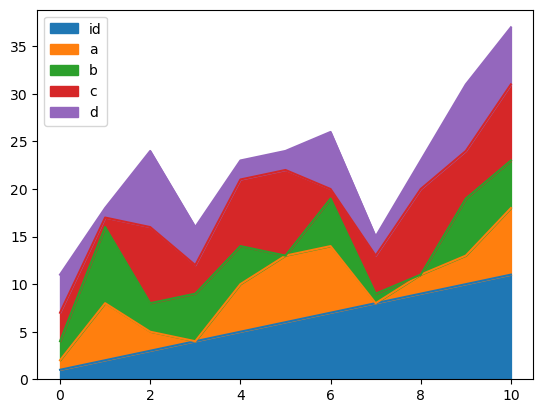

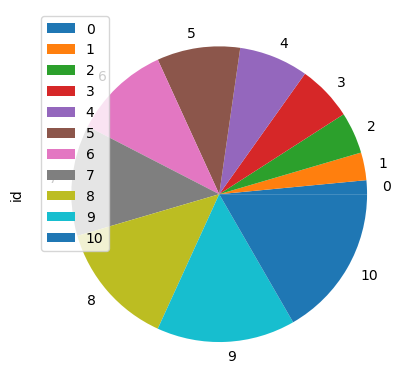

In [21]:
df = pd.read_sql_query("SELECT * FROM value", conn)
img = df.plot.area()
img2 = df.plot.pie(y='id')
img.figure.savefig('static\image.png', dpi=300)
img2.figure.savefig('image2.jpg', dpi=300)